In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pde_solver import CrankNicolsonPDESolver
from analytical import (
    BarrierDownAndOutCall,
    BarrierUpAndOutCall,
    BarrierDownAndInCall,
    BarrierUpAndInCall,
)

In [2]:
import warnings
warnings.filterwarnings("ignore") # ignore divide by 0 and log(0) warnings on the boundary of the grid

In [3]:
barrier_type_cls = {
    "down-and-out": BarrierDownAndOutCall,
    "up-and-out": BarrierUpAndOutCall,
    "down-and-in": BarrierDownAndInCall,
    "up-and-in": BarrierUpAndInCall,
}

  0%|          | 0/250 [00:00<?, ?it/s]

100%|██████████| 250/250 [00:00<00:00, 371.02it/s]


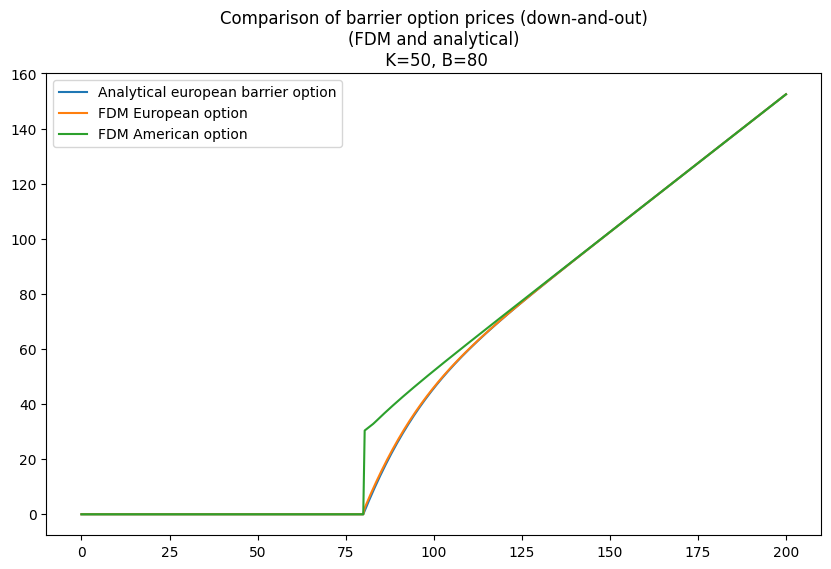

100%|██████████| 250/250 [00:00<00:00, 394.93it/s]


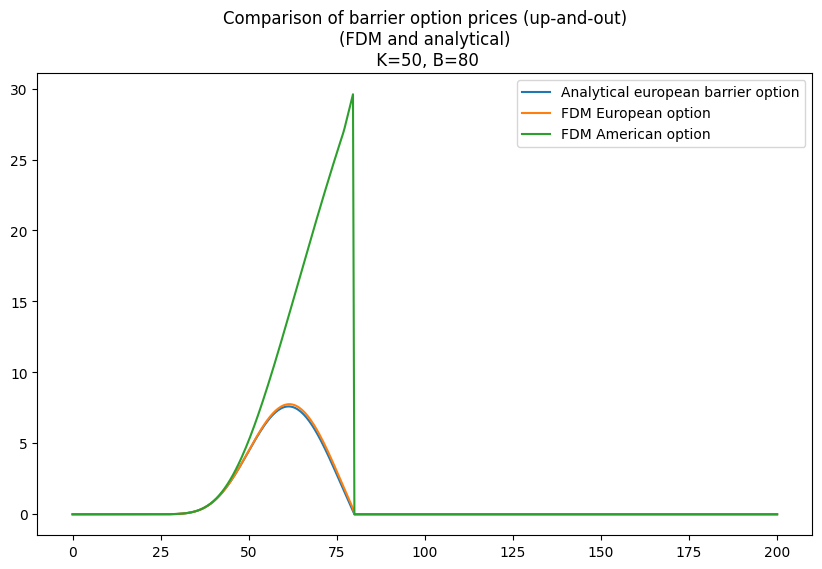

100%|██████████| 250/250 [00:00<00:00, 349.77it/s]


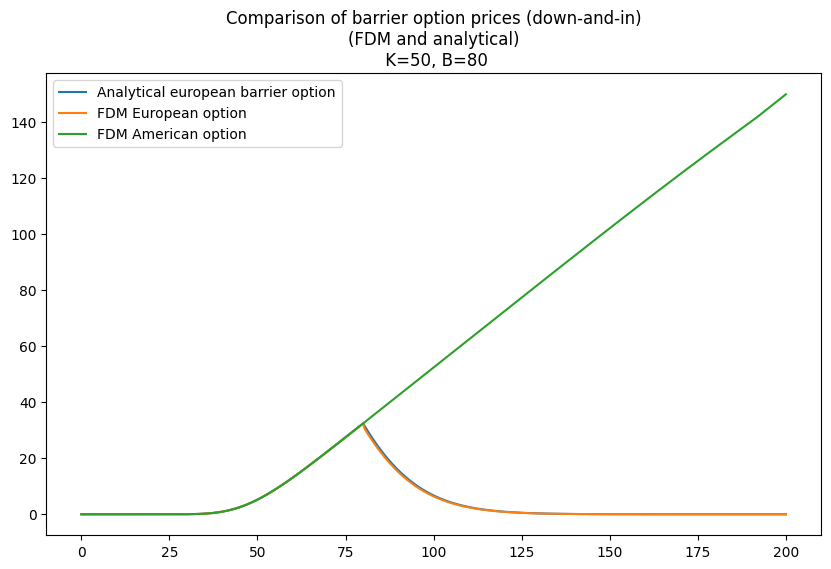

100%|██████████| 250/250 [00:03<00:00, 81.55it/s] 


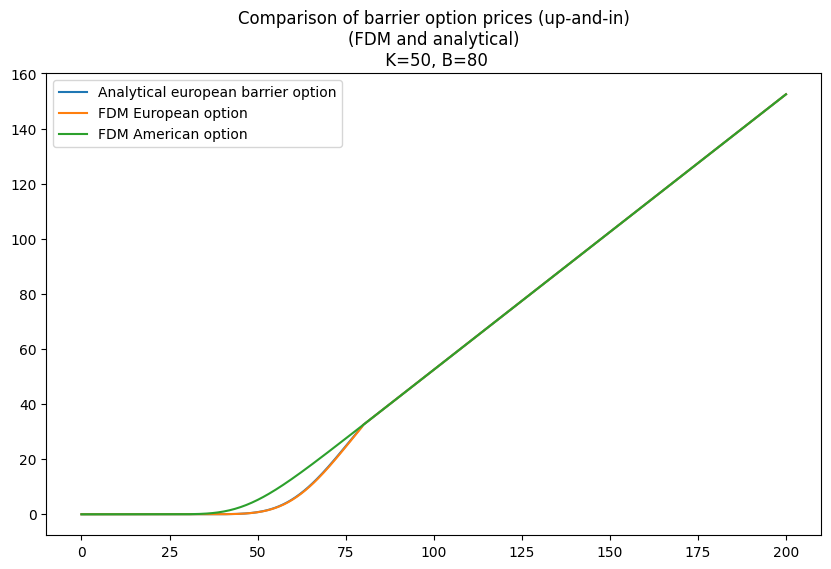

In [4]:
for barrier_type in [
    "down-and-out", 
    "up-and-out", 
    "down-and-in", 
    "up-and-in"
    ]:
    K = 50
    B = 80
    run_config = {
        "t": np.linspace(0, 1, 250 + 1),
        "x": np.linspace(0, 200, 500 + 1),
        "strike": K,
        "r": 0.05,
        "sigma": 0.2,
        "barrier": B,
        "barrier_type": barrier_type,
    }
    solver = CrankNicolsonPDESolver(run_config)
    solver.solve()

    american_solver = CrankNicolsonPDESolver({**run_config, "american": True})
    american_solver.solve()

    anayltical_price = barrier_type_cls[barrier_type](
        run_config["x"],
        run_config["strike"],
        1,
        run_config["r"],
        run_config["sigma"],
        run_config["barrier"],
    ).price()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(
        run_config["x"], anayltical_price, label="Analytical european barrier option"
    )
    ax.plot(run_config["x"], solver.grid[:, 0], label="FDM European option")
    ax.plot(run_config["x"], american_solver.grid[:, 0], label="FDM American option")
    ax.legend()
    ax.set_title(
        f"Comparison of barrier option prices ({barrier_type})\n(FDM and analytical)\n K={K}, B={B}"
    )
    plt.show()